In [176]:
import pandas as pd
data = pd.read_csv("Tripadvisordata_red.csv")

data= data.round(2)

list = []
for i in range(len(data["Type of food"])):  
    if "<div" in str(data["Type of food"][i]):
        list.append(i)
    
#print(list)
for i in list:
    data["Type of food"][i] = "Missing"


# set color 
green_color = "#00AF87"

C:\Users\sofie\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [177]:
data.head()

,Unnamed: 0,Name,Main rating,Ranking on list,Price range,Price class,Number of reviews,Location,Distance from Kgs. Nytorv,Service,Type of food,Address,Good price,Food,Atmosphere,New Price class,Price Class Numeric,Reverse ranking on list,Full ranking
0,1990,Café Koebenhavn,2.5,2000.0,NaN,--$$$$$$,2,"55.62942,12.63948",6606.0,NaN,NaN,"Kastrup Airport, København Danmark",NaN,NaN,NaN,$$$$$$,99,-2000.0,1
1,1988,Restaurant Laura,3.0,2013.0,------16,--$$-$$$,31,"55.77464,12.57555",10540.0,3.0,Missing,"Telt 52, 2, Dyrehavsbakken, 2930 Klampenborg, ...",3.0,3.0,NaN,$$-$$$,2,-2013.0,2
2,1989,Canton Restaurant,3.0,2012.0,------16275.-1.106.,--$$-$$$------,73,"55.673065,12.558967",1758.0,3.0,Asiatisk,"Vesterbrogade 20, København 1620 Danmark",3.0,3.0,3.0,$$-$$$,2,-2012.0,3
3,1967,Mamma's,3.0,2010.0,NaN,--$$$$$$,13,"55.67834,12.56556",1182.0,NaN,NaN,"Regnbuepladsen 3/5, København 1550 Danmark",NaN,NaN,NaN,$$$$$$,99,-2010.0,4
4,1986,Nubilo Pizza,3.0,2009.0,NaN,--$$$$$$,2,"55.66647,12.57651",1577.0,NaN,NaN,"Islands Brygge 27, København 2300 Danmark",NaN,NaN,NaN,$$$$$$,99,-2009.0,5


In [178]:
sum_tab = data.describe()
sum_tab.to_csv("Summary_tab.csv")

In [272]:
import matplotlib.pyplot as plt

mod_df = data 

# Obs filter restaurants more than 15 km from Kgs. Nytorv
#mod_df = mod_df.drop(mod_df[mod_df[] > 15000 ].index , inplace=True)
mod_df = data[data["Distance from Kgs. Nytorv"]<1000]


#mod_df.describe()
# OBS kør den forfra hvis du vil ændre i noget. 
mod_df

,Unnamed: 0,Name,Main rating,Ranking on list,Price range,Price class,Number of reviews,Location,Distance from Kgs. Nytorv,Service,Type of food,Address,Good price,Food,Atmosphere,New Price class,Price Class Numeric,Reverse ranking on list,Full ranking
5,1997,Hansens Is Kaffe,3.0,2004.0,NaN,--$$$$$$,2,"55.67906,12.59222",514.0,NaN,NaN,"Nyhavn 42B, København Danmark",NaN,NaN,NaN,$$$$$$,99,-2004.0,6
9,1998,Dorfs Gastrobar,3.0,1998.0,------16101.-127.,--$$-$$$---,16,"55.679314,12.57634",498.0,3.5,Spansk,"Valkendorfsgade 22, København 1151 Danmark",NaN,NaN,NaN,$$-$$$,2,-1998.0,10
11,1987,Cafe Restaurant Bar Hollywood,3.0,1995.0,------16,---,4,"55.67659,12.571",909.0,NaN,International,"Mikkel Bryggers Gade 2/4, København 1460 Danmark",NaN,NaN,NaN,$$$$$$,99,-1995.0,12
16,1995,Philly's Danmark,3.0,1988.0,------1620.-134.,--$$-$$$---,2,"55.68223,12.58476",253.0,NaN,Amerikansk,"Gothersgade 8F, København 1123 Danmark",NaN,NaN,NaN,$$-$$$,2,-1988.0,17
27,1962,Cafe Globetrotter,3.0,1974.0,"------16,",---,1 anmeldelse,"55.67502,12.580593",596.0,NaN,Dansk,"Copenhagen Airport, København Danmark",NaN,NaN,NaN,$$$$$$,99,-1974.0,28
28,1970,Arket,3.0,1973.0,"------16,",---,1 anmeldelse,"55.68045,12.578099",385.0,NaN,Europæisk,"Købmagergade 33, København Danmark",NaN,NaN,NaN,$$$$$$,99,-1973.0,29
29,1979,The Mexican Donkey,3.0,1972.0,------16,---,1 anmeldelse,"55.68176,12.58458",200.0,NaN,Mexicansk,Gothersgade 8 Located In The Bolton’s Food Cou...,NaN,NaN,NaN,$$$$$$,99,-1972.0,30
32,1963,Strædets Kaffebar,3.0,1969.0,NaN,--$$$$$$,1 anmeldelse,"55.67692,12.57394",727.0,NaN,NaN,"Rådhusstræde 4, København 1466 Danmark",NaN,NaN,NaN,$$$$$$,99,-1969.0,33
40,1971,Woodhouse Lounge,3.0,1960.0,NaN,--$$-$$$,9,"55.67796,12.5712",845.0,2.5,Missing,"Vestergade 3 Tivoli, København 1630 Danmark",3.0,3.0,NaN,$$-$$$,2,-1960.0,41
44,1943,Gorm bakery,3.0,1953.0,------16,--$$$$$$,10,"55.68503,12.58814",614.0,4.0,NaN,"Store Kongensgade 71, København 1264 Danmark",4.5,NaN,NaN,$$$$$$,99,-1953.0,45


In [273]:
# Mean ratings grouped by type of food
bar_df = mod_df.groupby(['Type of food'])['Main rating'].mean()
bar_df = pd.DataFrame(bar_df)

#bar_df.columns = ['Type of food', "Mean rating"]
bar_df2 = mod_df.groupby(['Type of food'])['Main rating'].count()
bar_df2 = pd.DataFrame(bar_df2)

bar_df3 = pd.merge(bar_df, bar_df2, on='Type of food', how='left')
bar_df3 = pd.DataFrame(bar_df3)

bar_df3.columns = ["Mean rating", "Number of restaurants"]
bar_df3.reset_index(inplace=True)

# Only if more than 10 restaurants
bar_df4 = bar_df3.loc[bar_df3['Number of restaurants'] > 10] 
bar_df4 = bar_df4.loc[bar_df3['Type of food'] != "Missing"] 

bar_df4 = bar_df4.sort_values(by=["Mean rating"])
bar_df4

,Type of food,Mean rating,Number of restaurants
4,Bar,3.932432,37
11,Europæisk,4.030928,97
22,Italiensk,4.052632,19
1,Amerikansk,4.058824,17
3,Asiatisk,4.119565,46
6,Café,4.134328,67
9,Dansk,4.183453,139


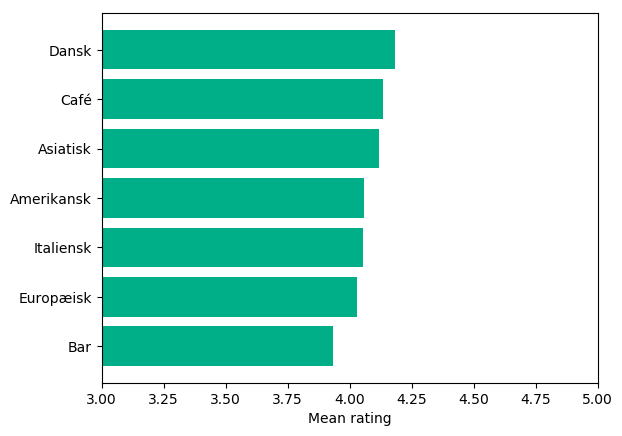

In [274]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()
plt.style.use('ggplot')

# Example data
rests = [bar_df4["Mean rating"]]
y_pos = bar_df4["Type of food"]
performance = bar_df4["Mean rating"]

ax.barh(y_pos, performance, align='center', color = green_color)
#ax.set_yticks(y_pos)
#ax.set_yticklabels("Type of food")
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mean rating')
ax.set_xlim(3,5)
#ax.set_title('How fast do you want to go today?')
label = [bar_df4["Mean rating"]]


plt.savefig('barplot_type.jpeg')



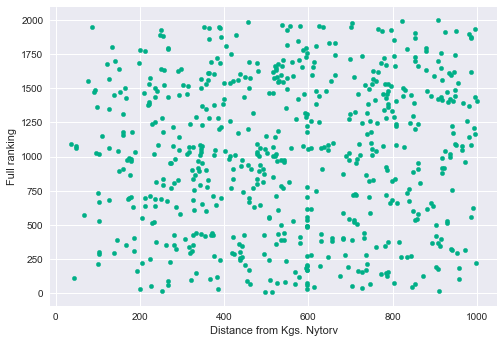

<Figure size 576x396 with 0 Axes>

In [275]:
%matplotlib inline
plt.style.use('seaborn')
mod_df.plot(x='Distance from Kgs. Nytorv', y='Full ranking', kind='scatter', color=green_color)
plt.show()
plt.savefig('dist_rankin_plot.jpeg')




In [276]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



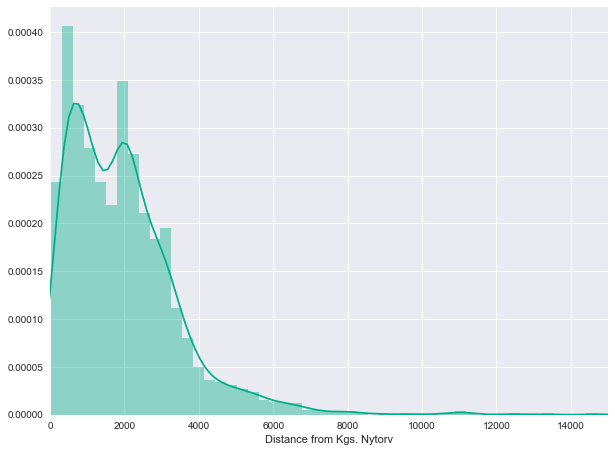

<Figure size 432x288 with 0 Axes>

In [277]:
plt.figure(figsize=(10,7.5))
plt.tight_layout()
seabornInstance.distplot(data['Distance from Kgs. Nytorv'], color = green_color)
plt.xlim(0, 15000)
plt.show()

plt.savefig('dist_plot.jpeg')


In [285]:
import statsmodels.api as sm

reg_df = mod_df.loc[mod_df['Price Class Numeric'] != 99] 
reg_df = mod_df.loc[mod_df['Full ranking'] != 2000] 


reg1 = sm.OLS(endog=reg_df['Full ranking'], exog=reg_df[['Distance from Kgs. Nytorv', 'Price Class Numeric', 'Service']], missing='drop')

results = reg1.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:           Full ranking   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     942.8
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          1.32e-192
Time:                        14:03:14   Log-Likelihood:                -3347.1
No. Observations:                 449   AIC:                             6700.
Df Residuals:                     446   BIC:                             6713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Distance from Kgs. Nyt

In [287]:
reg_df


,Unnamed: 0,Name,Main rating,Ranking on list,Price range,Price class,Number of reviews,Location,Distance from Kgs. Nytorv,Service,Type of food,Address,Good price,Food,Atmosphere,New Price class,Price Class Numeric,Reverse ranking on list,Full ranking
5,1997,Hansens Is Kaffe,3.0,2004.0,NaN,--$$$$$$,2,"55.67906,12.59222",514.0,NaN,NaN,"Nyhavn 42B, København Danmark",NaN,NaN,NaN,$$$$$$,99,-2004.0,6
9,1998,Dorfs Gastrobar,3.0,1998.0,------16101.-127.,--$$-$$$---,16,"55.679314,12.57634",498.0,3.5,Spansk,"Valkendorfsgade 22, København 1151 Danmark",NaN,NaN,NaN,$$-$$$,2,-1998.0,10
11,1987,Cafe Restaurant Bar Hollywood,3.0,1995.0,------16,---,4,"55.67659,12.571",909.0,NaN,International,"Mikkel Bryggers Gade 2/4, København 1460 Danmark",NaN,NaN,NaN,$$$$$$,99,-1995.0,12
16,1995,Philly's Danmark,3.0,1988.0,------1620.-134.,--$$-$$$---,2,"55.68223,12.58476",253.0,NaN,Amerikansk,"Gothersgade 8F, København 1123 Danmark",NaN,NaN,NaN,$$-$$$,2,-1988.0,17
27,1962,Cafe Globetrotter,3.0,1974.0,"------16,",---,1 anmeldelse,"55.67502,12.580593",596.0,NaN,Dansk,"Copenhagen Airport, København Danmark",NaN,NaN,NaN,$$$$$$,99,-1974.0,28
28,1970,Arket,3.0,1973.0,"------16,",---,1 anmeldelse,"55.68045,12.578099",385.0,NaN,Europæisk,"Købmagergade 33, København Danmark",NaN,NaN,NaN,$$$$$$,99,-1973.0,29
29,1979,The Mexican Donkey,3.0,1972.0,------16,---,1 anmeldelse,"55.68176,12.58458",200.0,NaN,Mexicansk,Gothersgade 8 Located In The Bolton’s Food Cou...,NaN,NaN,NaN,$$$$$$,99,-1972.0,30
32,1963,Strædets Kaffebar,3.0,1969.0,NaN,--$$$$$$,1 anmeldelse,"55.67692,12.57394",727.0,NaN,NaN,"Rådhusstræde 4, København 1466 Danmark",NaN,NaN,NaN,$$$$$$,99,-1969.0,33
40,1971,Woodhouse Lounge,3.0,1960.0,NaN,--$$-$$$,9,"55.67796,12.5712",845.0,2.5,Missing,"Vestergade 3 Tivoli, København 1630 Danmark",3.0,3.0,NaN,$$-$$$,2,-1960.0,41
44,1943,Gorm bakery,3.0,1953.0,------16,--$$$$$$,10,"55.68503,12.58814",614.0,4.0,NaN,"Store Kongensgade 71, København 1264 Danmark",4.5,NaN,NaN,$$$$$$,99,-1953.0,45


Text(0, 0.5, 'Ranking')

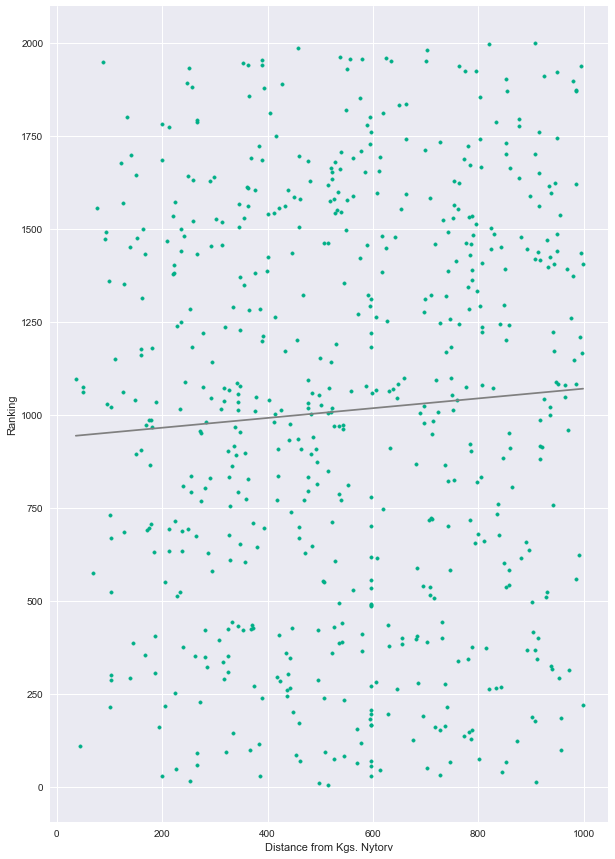

In [279]:
X = mod_df["Distance from Kgs. Nytorv"]
y = mod_df["Full ranking"]

import seaborn as sns
fig, ax = plt.subplots()
ax.scatter(X, y, marker='.', color = green_color)
plt.gcf().set_size_inches((10, 15))    

ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='grey')

ax.set_xlabel('Distance from Kgs. Nytorv')
ax.set_ylabel('Ranking')
